In [ ]:
# Instala RDKit usando Conda (toma ~1 min)
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
# Vuelve a ejecutar esto después del reinicio
!mamba install -c conda-forge rdkit -y


Looking for: ['rdkit']

[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  conda-forge/noarch                                            No change
[+] 0.2s
conda-forge/linux-64   2%[+] 0.3s
conda-forge/linux-64   4%[+] 0.4s
conda-forge/linux-64   9%[+] 0.5s
conda-forge/linux-64  16%[+] 0.6s
conda-forge/linux-64  20%[+] 0.7s
conda-forge/linux-64  27%[+] 0.8s
conda-forge/linux-64  33%[+] 0.9s
conda-forge/linux-64  35%[+] 1.0s
conda-forge/linux-64  38%[+] 1.1s
conda-forge/linux-64  42%[+] 1.2s
conda-forge/linux-64  44%[+] 1.3s
conda-forge/linux-64  47%[+] 1.4s
conda-forge/linux-64  50%[+] 1.5s
conda-forge/linux-64  51%[+] 1.6s
conda-forge/linux-64  53%[+] 1.7s
conda-forge/linux-64  56%[+] 1.8s
conda-forge/linux-64  62%[+] 1.9s
conda-forge/linux-64  65%[+] 2.0s
conda-forge/linux-64  66%[+] 2.1s
conda-forge/linux-64  70%[+] 2.2s
conda-forge/linux-64  76%[+] 2.3s
conda-forge/linux-64  81%[+] 2.4s
conda-forge/linux-64  84%[

In [ ]:
import pandas as pd
from rdkit import Chem
from collections import Counter
import re
from google.colab import files

In [ ]:
# Carga interactiva del archivo
uploaded = files.upload()

# Carga del primer archivo cargado como DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()


Saving Metal_Approved_Constitutional_Knime.csv to Metal_Approved_Constitutional_Knime.csv


,Name,Type,Number of aliphatic atoms,Number of aromatic atoms,Number of heteroatoms in aromatic rings,Number of carbons,Total number of atoms,Number of hydrogens,Number of heteroatoms,NumAmideBonds,NumStereocenters,NumRings,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,FractionCSP3,Molecular Formula
0,Oxaliplatin,Metallodrug,9.0,0.0,0.0,2.0,9.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,C2H2O4Pt
1,Carboplatin,Metallodrug,19.0,0.0,0.0,6.0,19.0,8.0,5.0,0.0,0.0,1.0,0.0,1.0,1.0,0.666667,C6H8O4Pt
2,Lobaplatin,Metallodrug,33.0,0.0,0.0,9.0,33.0,18.0,6.0,0.0,3.0,1.0,0.0,1.0,1.0,0.888889,C9H18N2O3Pt
3,Nedaplatin,Metallodrug,10.0,0.0,0.0,2.0,10.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,C2H4O3Pt
4,Picoplatin,Metallodrug,11.0,6.0,1.0,6.0,17.0,7.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.166667,C6H7Cl2NPt


In [ ]:
def contar_atom_from_formula(formula):
    patron = r'([A-Z][a-z]*)(\d*)'
    tokens = re.findall(patron, formula)
    atom_count = Counter()
    for (elemento, cantidad) in tokens:
        cantidad = int(cantidad) if cantidad else 1
        atom_count[elemento] += cantidad
    return atom_count

In [ ]:
df['Conteo_átomos'] = df['Molecular Formula'].apply(contar_atom_from_formula)
df.head()

,Name,Type,Number of aliphatic atoms,Number of aromatic atoms,Number of heteroatoms in aromatic rings,Number of carbons,Total number of atoms,Number of hydrogens,Number of heteroatoms,NumAmideBonds,NumStereocenters,NumRings,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,FractionCSP3,Molecular Formula,Conteo_átomos
0,Oxaliplatin,Metallodrug,9.0,0.0,0.0,2.0,9.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,C2H2O4Pt,"{'C': 2, 'H': 2, 'O': 4, 'Pt': 1}"
1,Carboplatin,Metallodrug,19.0,0.0,0.0,6.0,19.0,8.0,5.0,0.0,0.0,1.0,0.0,1.0,1.0,0.666667,C6H8O4Pt,"{'C': 6, 'H': 8, 'O': 4, 'Pt': 1}"
2,Lobaplatin,Metallodrug,33.0,0.0,0.0,9.0,33.0,18.0,6.0,0.0,3.0,1.0,0.0,1.0,1.0,0.888889,C9H18N2O3Pt,"{'C': 9, 'H': 18, 'N': 2, 'O': 3, 'Pt': 1}"
3,Nedaplatin,Metallodrug,10.0,0.0,0.0,2.0,10.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,C2H4O3Pt,"{'C': 2, 'H': 4, 'O': 3, 'Pt': 1}"
4,Picoplatin,Metallodrug,11.0,6.0,1.0,6.0,17.0,7.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.166667,C6H7Cl2NPt,"{'C': 6, 'H': 7, 'Cl': 2, 'N': 1, 'Pt': 1}"


In [ ]:
# Extraer todos los elementos químicos únicos
todos_elementos = sorted(set(e for d in df['Conteo_átomos'] for e in d))

# Crear columnas separadas para cada átomo
for elemento in todos_elementos:
    df[elemento] = df['Conteo_átomos'].apply(lambda x: x.get(elemento, 0))

df.head()


,Name,Type,Number of aliphatic atoms,Number of aromatic atoms,Number of heteroatoms in aromatic rings,Number of carbons,Total number of atoms,Number of hydrogens,Number of heteroatoms,NumAmideBonds,...,Si,Sm,Sn,Sr,Tc,V,Xe,Y,Zn,Zr
0,Oxaliplatin,Metallodrug,9.0,0.0,0.0,2.0,9.0,2.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Carboplatin,Metallodrug,19.0,0.0,0.0,6.0,19.0,8.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Lobaplatin,Metallodrug,33.0,0.0,0.0,9.0,33.0,18.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Nedaplatin,Metallodrug,10.0,0.0,0.0,2.0,10.0,4.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Picoplatin,Metallodrug,11.0,6.0,1.0,6.0,17.0,7.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Elementos 1
Non_Metals = ['C', 'H', 'O', 'N']

# Asegúrate de que existan en el DataFrame
Non_Metals = [e for e in Non_Metals if e in df.columns]

In [ ]:
# Elementos 1
Non_Metals_2 = ['P', 'S', 'Se']

# Asegúrate de que existan en el DataFrame
Non_Metals_2 = [e for e in Non_Metals_2 if e in df.columns]

In [ ]:
# Elementos 2
Met_Alcal = ['Li', 'Na', 'K', 'Rb', 'Cs', 'Fr']

# Asegúrate de que existan en el DataFrame
Met_Alcal = [e for e in Met_Alcal if e in df.columns]

In [ ]:
# Elementos 3
Lanta = ['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Ra']

# Asegúrate de que existan en el DataFrame
Lanta = [e for e in Lanta if e in df.columns]

In [ ]:
Lanta

['Mg', 'Sr']

In [ ]:
# Elementos 4
Halog = ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Rn']

# Asegúrate de que existan en el DataFrame
Halog = [e for e in Halog if e in df.columns]

In [ ]:
# Unir todos los elementos que se deben excluir
elementos_excluir = Non_Metals + Non_Metals_2 + Met_Alcal + Lanta + Halog

In [ ]:
elementos_excluir

['C',
 'H',
 'O',
 'N',
 'P',
 'S',
 'Se',
 'Na',
 'K',
 'Rb',
 'Mg',
 'Sr',
 'He',
 'Ne',
 'Kr',
 'Xe']

In [ ]:
# Todos los elementos que no sean ...

Otros = [e for e in df.columns if e not in elementos_excluir if len(e) == 2 and e.isalpha()]

In [ ]:
Otros

['Ag',
 'Al',
 'Au',
 'Bi',
 'Br',
 'Cl',
 'Co',
 'Cr',
 'Cu',
 'Fe',
 'Ga',
 'Gd',
 'Lu',
 'Mn',
 'Mo',
 'Pd',
 'Pt',
 'Re',
 'Ru',
 'Si',
 'Sm',
 'Sn',
 'Tc',
 'Zn',
 'Zr']

In [ ]:
# Suma por categoría
grupo_Non_Metals = df.groupby('Type')[Non_Metals].sum()
grupo_Non_Metals_2 = df.groupby('Type')[Non_Metals_2].sum()
grupo_Met_Alcal = df.groupby('Type')[Met_Alcal].sum()
#grupo_Lanta = df.groupby('Type')[Lanta].sum()
#grupo_Halog = df.groupby('Type')[Halog].sum()
grupo_otros = df.groupby('Type')[Otros].sum()

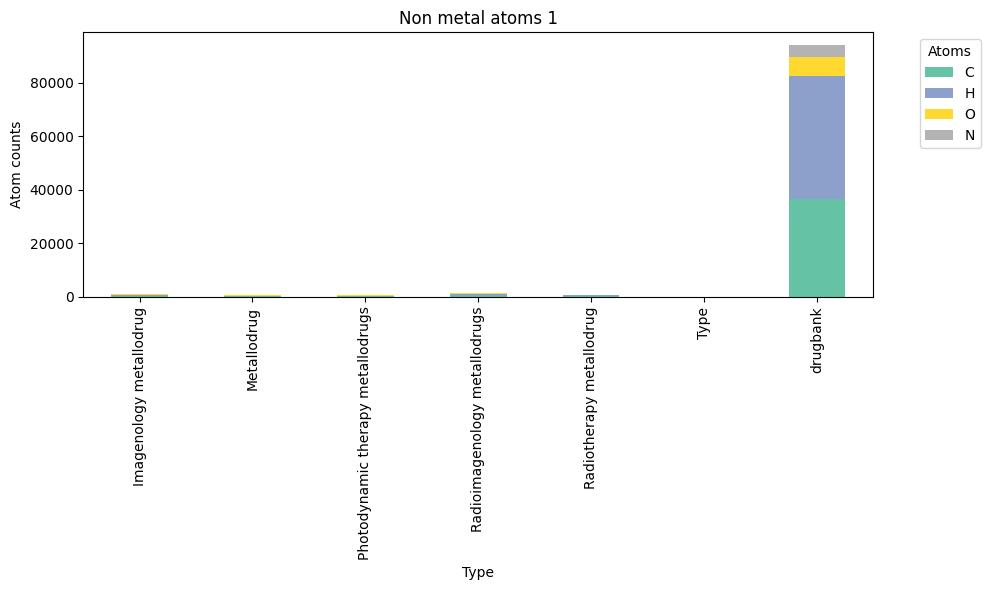

In [ ]:
import matplotlib.pyplot as plt

# Gráfico 1
grupo_Non_Metals.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.ylabel("Atom counts")
plt.title("Non metal atoms 1")
plt.legend(title="Atoms", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


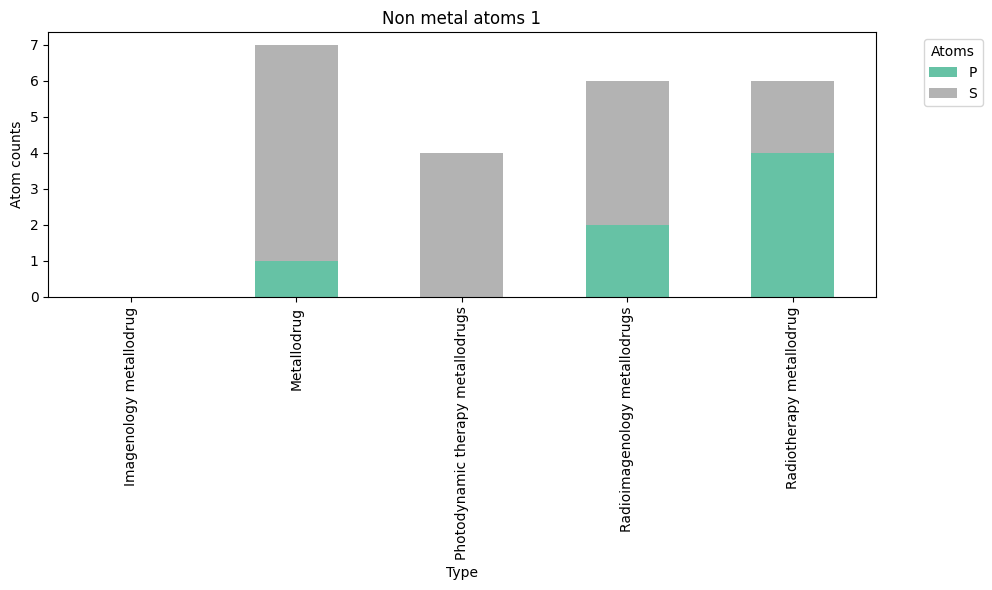

In [ ]:
import matplotlib.pyplot as plt

# Gráfico 2
grupo_Non_Metals_2.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.ylabel("Atom counts")
plt.title("Non metal atoms 1")
plt.legend(title="Atoms", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


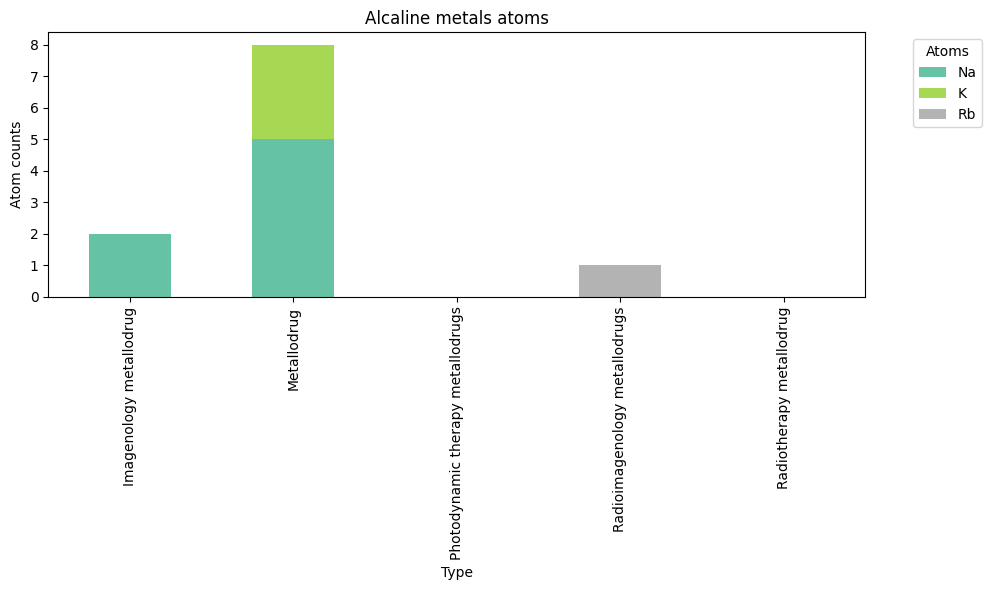

In [ ]:
import matplotlib.pyplot as plt

# Gráfico 3
grupo_Met_Alcal.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.ylabel("Atom counts")
plt.title("Alcaline metals atoms")
plt.legend(title="Atoms", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


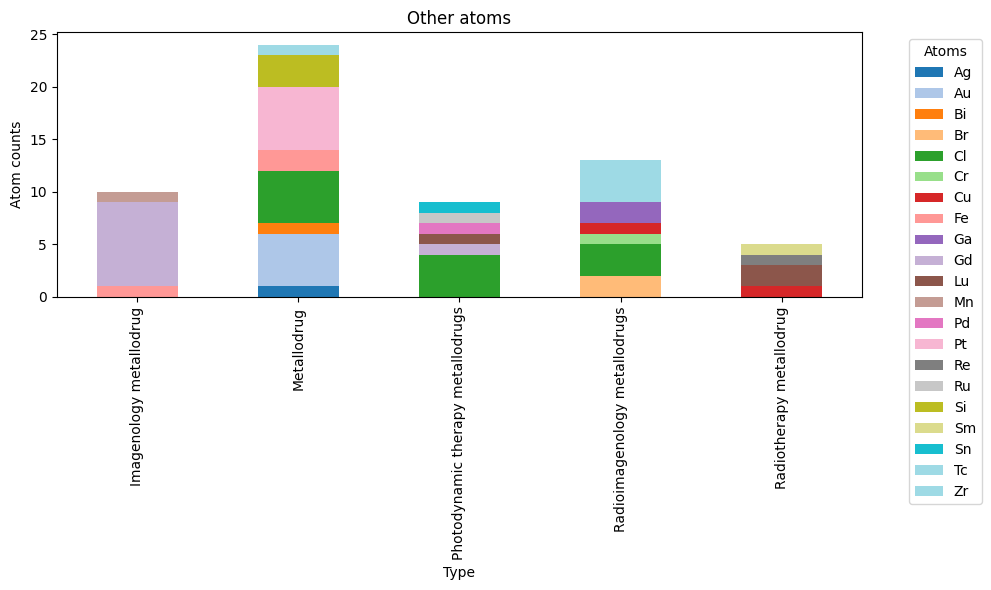

In [ ]:
import matplotlib.pyplot as plt

# Gráfico con mejor contraste de colores
grupo_otros.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.ylabel("Atom counts")
plt.title("Other atoms")
plt.legend(title="Atoms", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
